This allows me to connect to the files via google drive

In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import drive
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
import os
import random
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Pre-analysis

In [3]:
train_data = '/content/drive/MyDrive/Msc Data Science/Coursework /imageset/train'
val_data = '/content/drive/MyDrive/Msc Data Science/Coursework /imageset/val'

## This Allows me to preprocess the data

In [4]:
# Define batch size and image size
BATCH_SIZE = 32
IMG_SIZE = (256, 256)

# Load image datasets from directories
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_data, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE)
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(val_data, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE)

# Function to preprocess images (including normalization)
def preprocess_image(image, label):
    # Convert image to float32
    image = tf.cast(image, tf.float32)
    # Normalize pixel values to [0, 1]
    image /= 255.0
    return image, label

# Apply preprocessing to the datasets
train_dataset = train_dataset.map(preprocess_image)
val_dataset = val_dataset.map(preprocess_image)



Found 9469 files belonging to 10 classes.
Found 3925 files belonging to 10 classes.


## importing images and seeing how much files are within the folder and how many classes there are. This allows me to visualise the data

Found 9469 files belonging to 10 classes.
['n01440764', 'n02102040', 'n02979186', 'n03000684', 'n03028079', 'n03394916', 'n03417042', 'n03425413', 'n03445777', 'n03888257']


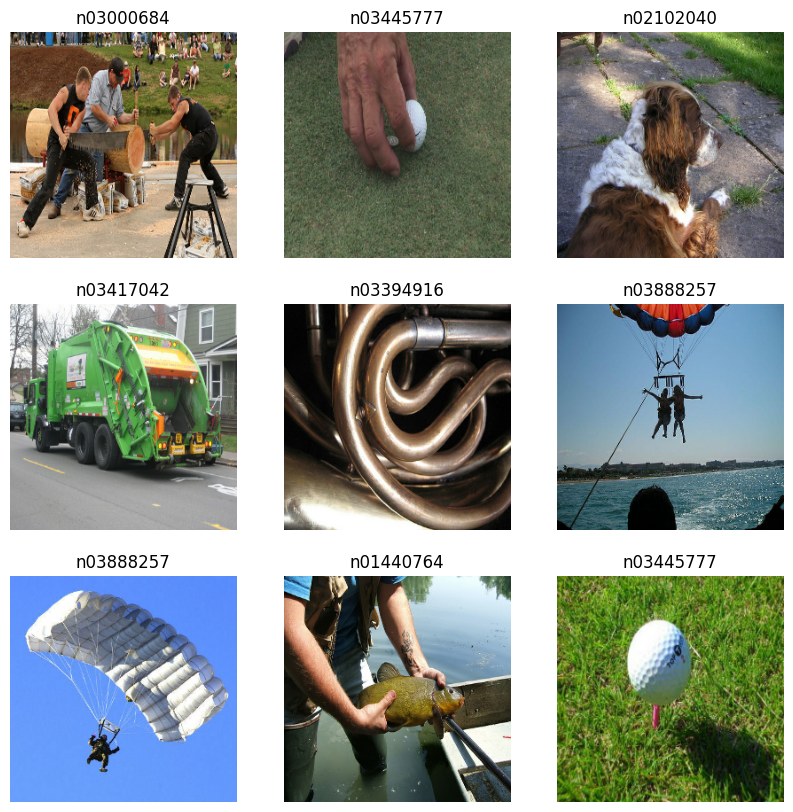

In [5]:
BATCH_SIZE = 32
IMG_SIZE = (256, 256)
train_dataset = image_dataset_from_directory(train_data,shuffle=True,batch_size=BATCH_SIZE,image_size=IMG_SIZE)

class_names = train_dataset.class_names
print(class_names)
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[(labels[i])])
    plt.axis("off")

Found 3925 files belonging to 10 classes.
['n01440764', 'n02102040', 'n02979186', 'n03000684', 'n03028079', 'n03394916', 'n03417042', 'n03425413', 'n03445777', 'n03888257']


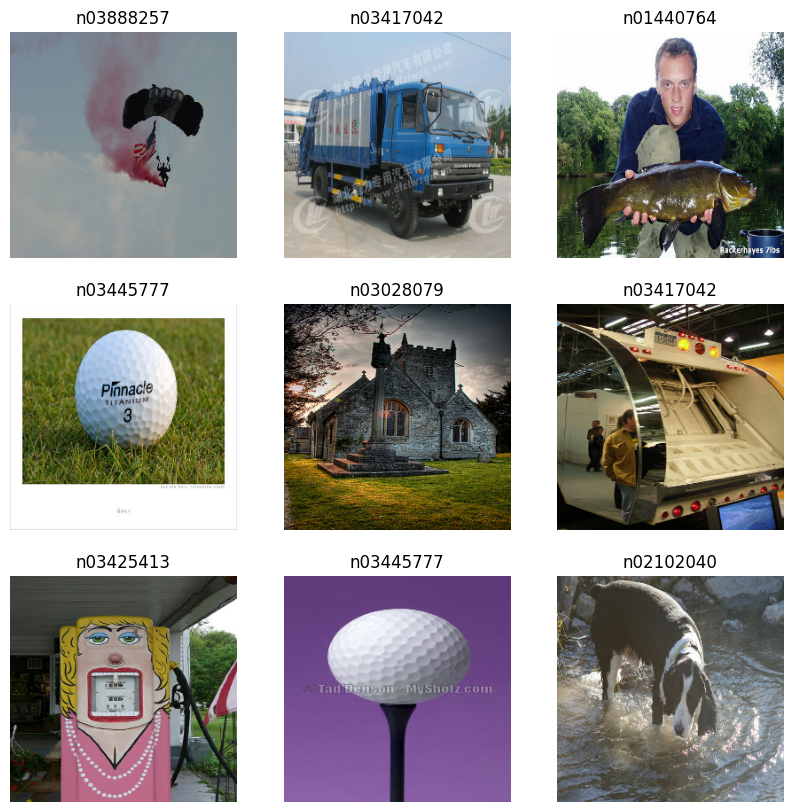

In [6]:
BATCH_SIZE = 32
IMG_SIZE = (256, 256)
val_dataset = image_dataset_from_directory(val_data,shuffle=True,batch_size=BATCH_SIZE,image_size=IMG_SIZE)

class_names = val_dataset.class_names
print(class_names)
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[(labels[i])])
    plt.axis("off")

## Comparing Width and length of the classes within the train and test data in order to see distribution

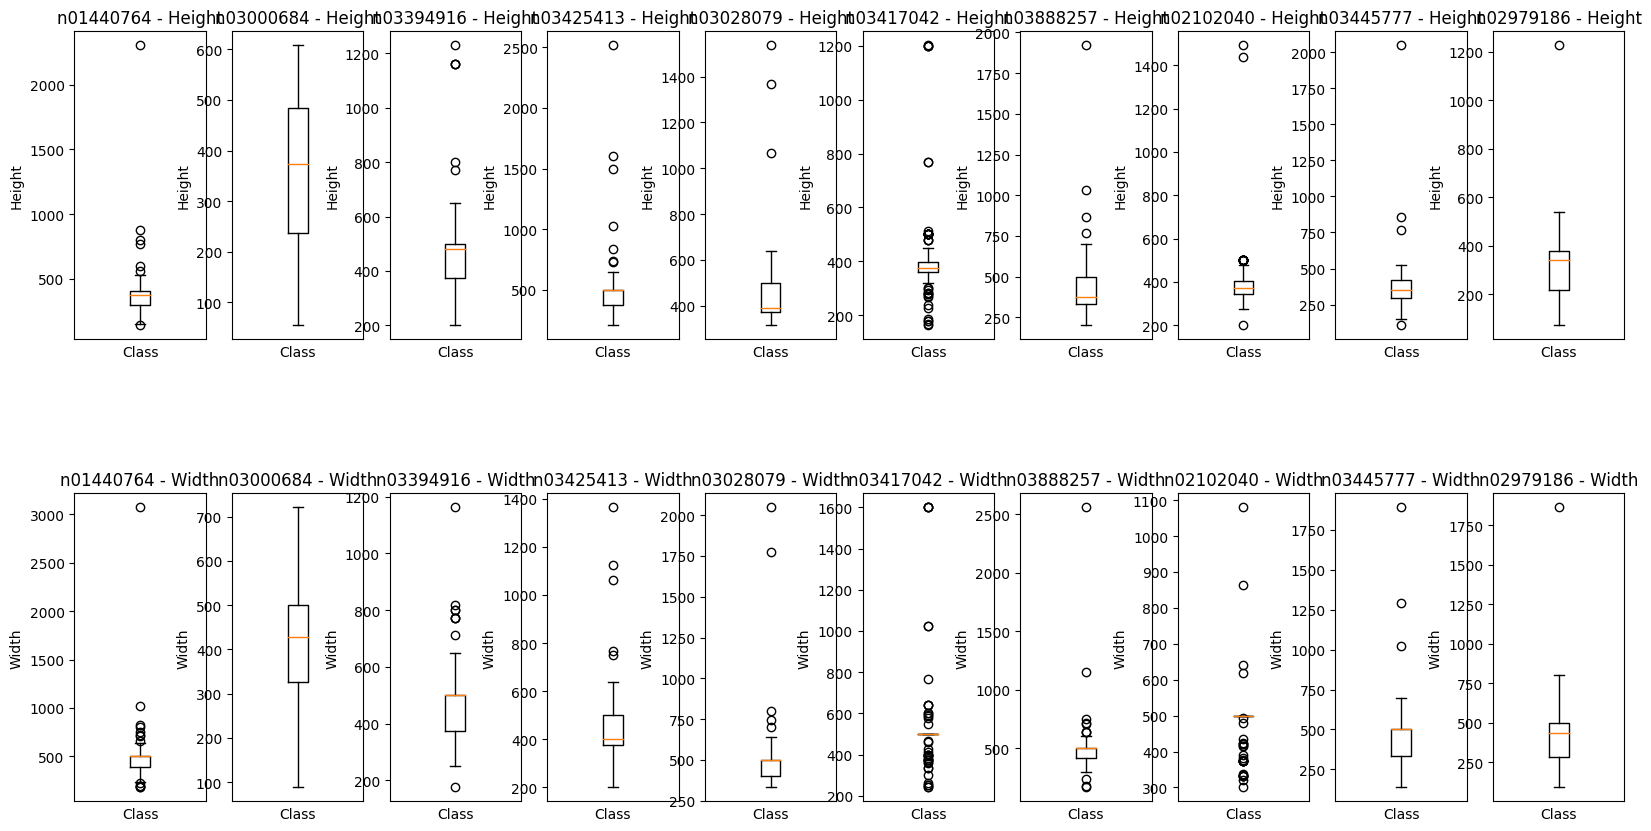

In [7]:
sample_size_per_class = 100  # This can be adjusted to the same size that i needed

# Initialize dictionaries to store image sizes for all classes

class_heights = {}
class_widths = {}

# Iterate through each class directory
for class_name in os.listdir(train_data):
    class_dir = os.path.join(train_data, class_name)
    if os.path.isdir(class_dir):
        # Initialize lists to store image sizes for the current class
        class_heights[class_name] = []
        class_widths[class_name] = []

        # Get a random sample of images from the class directory
        images = os.listdir(class_dir)
        sample_images = random.sample(images, min(sample_size_per_class, len(images)))

        # Iterate through each sampled image in the class directory
        for image_file in sample_images:
            image_path = os.path.join(class_dir, image_file)
            # Read the image using OpenCV
            image = cv2.imread(image_path)
            if image is not None:
                # Get the size of the image (height, width)
                height, width, _ = image.shape
                # Append the image sizes to the lists for the current class
                class_heights[class_name].append(height)
                class_widths[class_name].append(width)

# I then created box with whisker plots for image sizes that would represent each class

fig, axes = plt.subplots(nrows=2, ncols=len(class_heights), figsize=(20, 10))
fig.subplots_adjust(hspace=0.5)
for i, (class_name, heights) in enumerate(class_heights.items()):
    axes[0, i].boxplot(heights)
    axes[0, i].set_title(f'{class_name} - Height')
    axes[0, i].set_xlabel('Class')
    axes[0, i].set_ylabel('Height')
    axes[0, i].set_xticks([])

for i, (class_name, widths) in enumerate(class_widths.items()):
    axes[1, i].boxplot(widths)
    axes[1, i].set_title(f'{class_name} - Width')
    axes[1, i].set_xlabel('Class')
    axes[1, i].set_ylabel('Width')
    axes[1, i].set_xticks([])

plt.show()


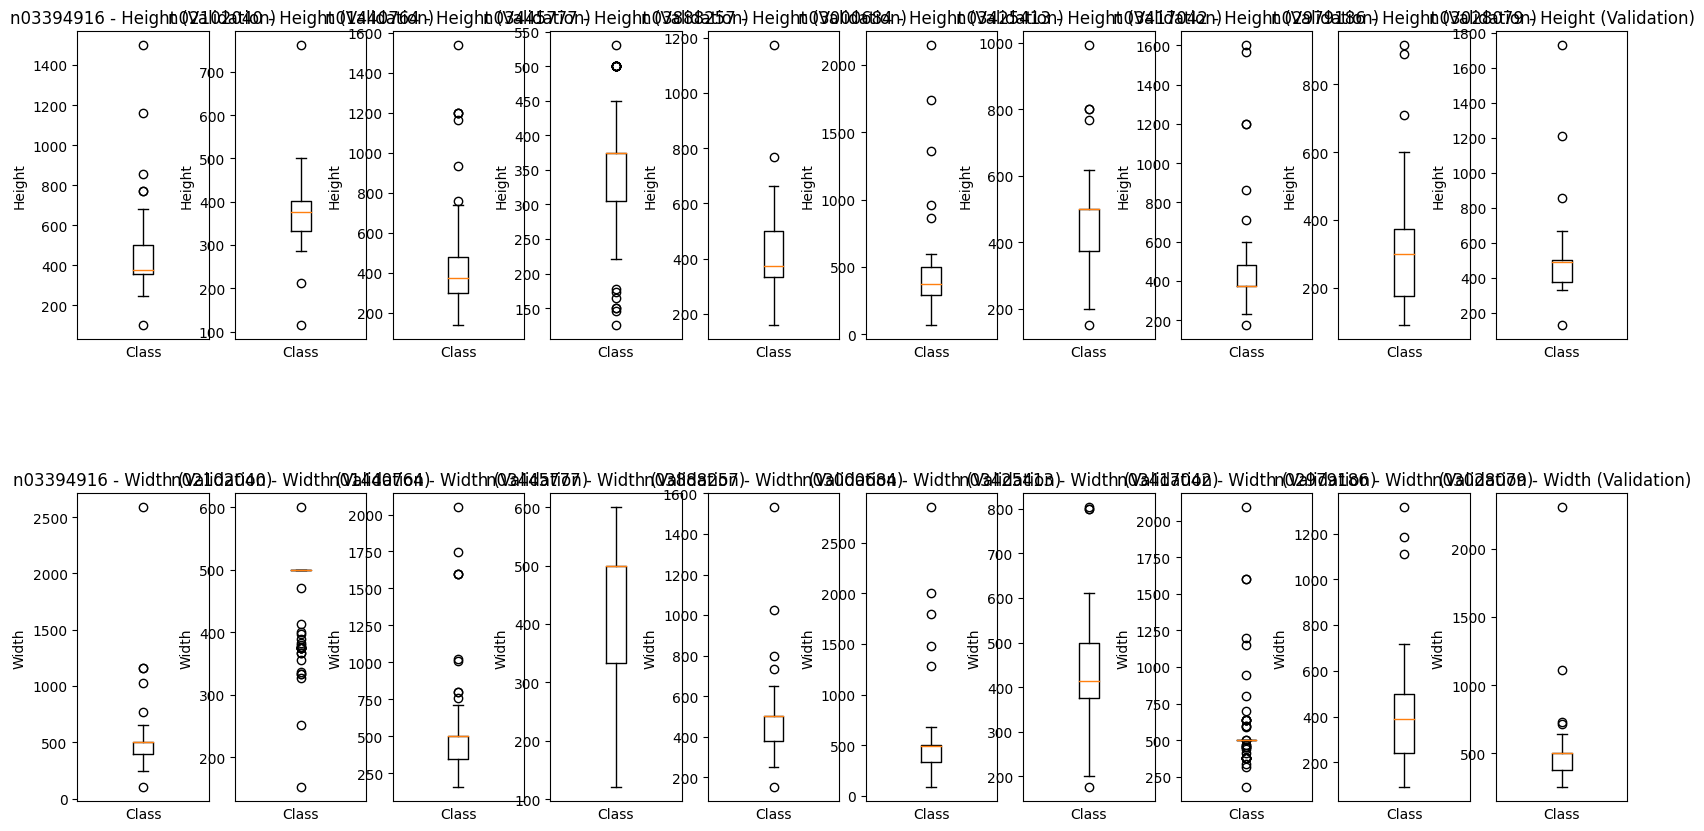

In [8]:

# This can be adjusted to the same. size that i needed

sample_size_per_class = 100

# initialize dictionaries to store image sizes for all classes

class_heights_val = {}
class_widths_val = {}

# Iterate through each class directory in the validation data

for class_name in os.listdir(val_data):
    class_dir = os.path.join(val_data, class_name)
    if os.path.isdir(class_dir):
        # Initialize lists to store image sizes for the current class
        class_heights_val[class_name] = []
        class_widths_val[class_name] = []

        # Get a random sample of images from the class directory
        images = os.listdir(class_dir)
        sample_images = random.sample(images, min(sample_size_per_class, len(images)))

        # Iterate through each sampled image in the class directory
        for image_file in sample_images:
            image_path = os.path.join(class_dir, image_file)
            # Read the image using OpenCV
            image = cv2.imread(image_path)
            if image is not None:
                # Get the size of the image (height, width)
                height, width, _ = image.shape
                # Append the image sizes to the lists for the current class
                class_heights_val[class_name].append(height)
                class_widths_val[class_name].append(width)

# Create box with whisker plots for image sizes for each class in the validation data

fig, axes = plt.subplots(nrows=2, ncols=len(class_heights_val), figsize=(20, 10))
fig.subplots_adjust(hspace=0.5)
for i, (class_name, heights) in enumerate(class_heights_val.items()):
    axes[0, i].boxplot(heights)
    axes[0, i].set_title(f'{class_name} - Height (Validation)')
    axes[0, i].set_xlabel('Class')
    axes[0, i].set_ylabel('Height')
    axes[0, i].set_xticks([])

for i, (class_name, widths) in enumerate(class_widths_val.items()):
    axes[1, i].boxplot(widths)
    axes[1, i].set_title(f'{class_name} - Width (Validation)')
    axes[1, i].set_xlabel('Class')
    axes[1, i].set_ylabel('Width')
    axes[1, i].set_xticks([])

plt.show()


# Building Model and testing accuracy

## CNN Model from scratch

In [9]:

# Define image size and batch size
image_size = (256, 256)
batch_size = 32

# Create ImageDataGenerator instances for training and validation/Testing data
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_data,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Here i have to define a sequential model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Model compilation
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model Training
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)

# Training and testing model evaluation
train_loss, train_accuracy = model.evaluate(train_generator)
val_loss, val_accuracy = model.evaluate(val_generator)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.
Epoch 1/5
296/296 [==============================] - 152s 473ms/step - loss: 1.9030 - accuracy: 0.3427 - val_loss: 1.3922 - val_accuracy: 0.5610
Epoch 2/5
296/296 [==============================] - 80s 272ms/step - loss: 1.3868 - accuracy: 0.5438 - val_loss: 1.1639 - val_accuracy: 0.6290
Epoch 3/5
296/296 [==============================] - 80s 271ms/step - loss: 1.1472 - accuracy: 0.6261 - val_loss: 1.0761 - val_accuracy: 0.6586
Epoch 4/5
296/296 [==============================] - 80s 270ms/step - loss: 0.9557 - accuracy: 0.6844 - val_loss: 1.1184 - val_accuracy: 0.6512
Epoch 5/5
123/123 [==============================] - 24s 198ms/step - loss: 1.0906 - accuracy: 0.6820
Training Accuracy: 91.94%
Validation Accuracy: 68.20%


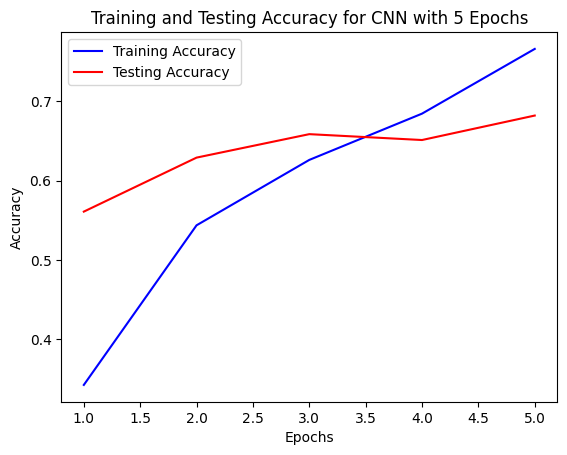

In [10]:


# Extract training and validation accuracy from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting the training and validation accuracy as lines
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')  # 'b-' represents the  blue line
plt.plot(epochs, val_accuracy, 'r-', label='Testing Accuracy')  # 'r-' represents the red line
plt.title('Training and Testing Accuracy for CNN with 5 Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [11]:
# Define image size and batch size
image_size = (256, 256)
batch_size = 32

# Create ImageDataGenerator instances for training and validation/Testing data
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_data,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Here i have to define a sequential model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Model compilation
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model Training
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Training and testing model evaluation
train_loss, train_accuracy = model.evaluate(train_generator)
val_loss, val_accuracy = model.evaluate(val_generator)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.
Epoch 1/10
296/296 [==============================] - 87s 289ms/step - loss: 1.9127 - accuracy: 0.3429 - val_loss: 1.4600 - val_accuracy: 0.5080
Epoch 2/10
296/296 [==============================] - 80s 271ms/step - loss: 1.3683 - accuracy: 0.5543 - val_loss: 1.2088 - val_accuracy: 0.6196
Epoch 3/10
296/296 [==============================] - 81s 274ms/step - loss: 1.0780 - accuracy: 0.6523 - val_loss: 1.1542 - val_accuracy: 0.6311
Epoch 4/10
296/296 [==============================] - 81s 274ms/step - loss: 0.8334 - accuracy: 0.7237 - val_loss: 1.2280 - val_accuracy: 0.6153
Epoch 5/10
296/296 [==============================] - 80s 271ms/step - loss: 0.6037 - accuracy: 0.7993 - val_loss: 1.2418 - val_accuracy: 0.6296
Epoch 6/10
296/296 [==============================] - 81s 274ms/step - loss: 0.4547 - accuracy: 0.8458 - val_loss: 1.2957 - val_accuracy: 0.6382
Epoch 7/10
296/296 [========================

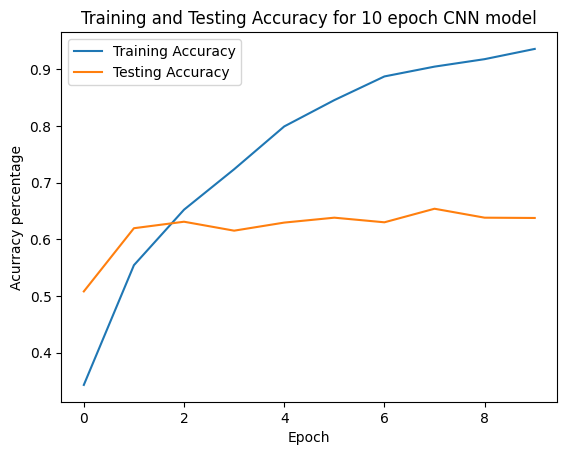

In [12]:
# Access the accuracy values from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot training and validation accuracies
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Testing Accuracy')
plt.title('Training and Testing Accuracy for 10 epoch CNN model')
plt.xlabel('Epoch')
plt.ylabel('Acurracy percentage')
plt.legend()
plt.show()


## The use of transfer learning via VGG16

In [13]:

# Here i must define both the image and batch size
image_size = (256, 256)  # Adjusted image size
batch_size = 32

# Create ImageDataGenerator instances for training and validation data like ive done earlier
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_data,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load a pre-trained VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# the convulutional base is then forzen
base_model.trainable = False

# I then create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=5, # I change the epochs to see if there is anything different wihtin the accuracy
    validation_data=val_generator
)

# Evaluate the model on both training and validation data
train_loss, train_accuracy = model.evaluate(train_generator)
val_loss, val_accuracy = model.evaluate(val_generator)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {val_accuracy * 100:.2f}%")

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.
58889256/58889256 [==============================] - 4s 0us/step
Epoch 1/5
296/296 [==============================] - 89s 280ms/step - loss: 1.2850 - accuracy: 0.5941 - val_loss: 0.7079 - val_accuracy: 0.7987
Epoch 2/5
296/296 [==============================] - 80s 272ms/step - loss: 0.7060 - accuracy: 0.7860 - val_loss: 0.5202 - val_accuracy: 0.8471
Epoch 3/5
296/296 [==============================] - 81s 272ms/step - loss: 0.5746 - accuracy: 0.8215 - val_loss: 0.4446 - val_accuracy: 0.8617
Epoch 4/5
296/296 [==============================] - 81s 275ms/step - loss: 0.5031 - accuracy: 0.8481 - val_loss: 0.4084 - val_accuracy: 0.8696
Epoch 5/5
123/123 [==============================] - 24s 195ms/step - loss: 0.3830 - accuracy: 0.8764
Training Accuracy: 90.24%
Test Accuracy: 87.64%


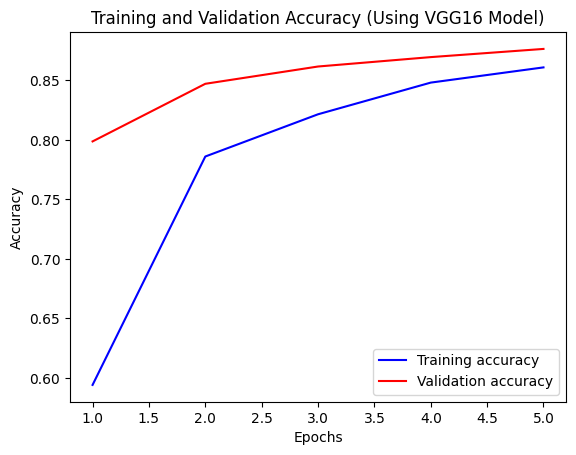

In [14]:

# Extract training and validation accuracy from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting the training and validation accuracy as lines
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b-', label='Training accuracy')  # 'b-' for blue line
plt.plot(epochs, val_accuracy, 'r-', label='Validation accuracy')  # 'r-' for red line
plt.title('Training and Validation Accuracy (Using VGG16 Model)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Here just like before i increased the epoch to see if there is any difference

In [15]:

# Here i must define both the image and batch size
image_size = (256, 256)  # Adjusted image size
batch_size = 32

# Create ImageDataGenerator instances for training and validation data like ive done earlier
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_data,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load a pre-trained VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# the convulutional base is then forzen
base_model.trainable = False

# I then create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10, # I change the epochs to see if there is anything different within the accuracy
    validation_data=val_generator
)

# Evaluate the model on both training and validation data
train_loss, train_accuracy = model.evaluate(train_generator)
val_loss, val_accuracy = model.evaluate(val_generator)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {val_accuracy * 100:.2f}%")

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.
Epoch 1/10
296/296 [==============================] - 85s 272ms/step - loss: 1.2816 - accuracy: 0.6012 - val_loss: 0.7282 - val_accuracy: 0.8074
Epoch 2/10
296/296 [==============================] - 80s 269ms/step - loss: 0.7082 - accuracy: 0.7870 - val_loss: 0.5333 - val_accuracy: 0.8431
Epoch 3/10
296/296 [==============================] - 80s 272ms/step - loss: 0.5782 - accuracy: 0.8259 - val_loss: 0.4530 - val_accuracy: 0.8624
Epoch 4/10
296/296 [==============================] - 80s 269ms/step - loss: 0.5133 - accuracy: 0.8433 - val_loss: 0.4178 - val_accuracy: 0.8724
Epoch 5/10
296/296 [==============================] - 78s 264ms/step - loss: 0.4592 - accuracy: 0.8615 - val_loss: 0.3899 - val_accuracy: 0.8729
Epoch 6/10
296/296 [==============================] - 79s 268ms/step - loss: 0.4332 - accuracy: 0.8634 - val_loss: 0.3808 - val_accuracy: 0.8759
Epoch 7/10
296/296 [========================

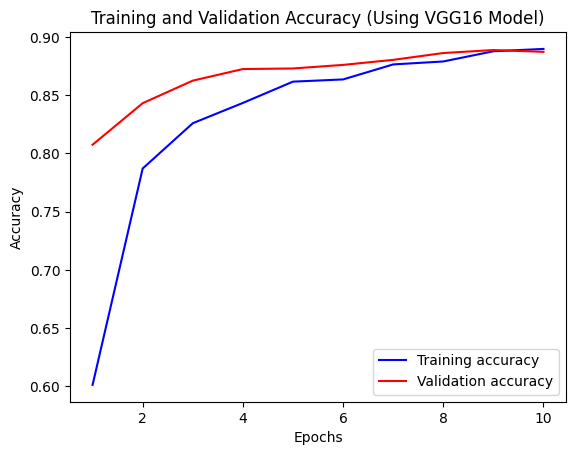

In [16]:

# Extract training and validation accuracy from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting the training and validation accuracy as lines
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b-', label='Training accuracy')  # 'b-' for blue line
plt.plot(epochs, val_accuracy, 'r-', label='Validation accuracy')  # 'r-' for red line
plt.title('Training and Validation Accuracy (Using VGG16 Model)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## The use of  transfer learning resNet

In [17]:

# Define image size and batch size
image_size = (256, 256)
batch_size = 32

# Create ImageDataGenerator instances for training and validation data
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_data,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load ResNet50 model without the top layers like the VGG16 model i used prior to this
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Flatten the output of the base just like before
x = layers.Flatten()(base_model.output)

# A fully layer with ReLU activation layer is connected
x = layers.Dense(128, activation='relu')(x)

# this prevent overfitting by adding a dropout layer
x = layers.Dropout(0.5)(x)

# Add the final output layer with softmax activation
predictions = layers.Dense(10, activation='softmax')(x)

# Define the model
model = models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model Training
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)

# Training and testing data evaluation
train_loss, train_accuracy = model.evaluate(train_generator)
val_loss, val_accuracy = model.evaluate(val_generator)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.
94765736/94765736 [==============================] - 5s 0us/step
Epoch 1/5
296/296 [==============================] - 121s 289ms/step - loss: 2.3592 - accuracy: 0.2917 - val_loss: 5.8687 - val_accuracy: 0.1009
Epoch 2/5
296/296 [==============================] - 81s 274ms/step - loss: 1.5345 - accuracy: 0.5376 - val_loss: 5.8365 - val_accuracy: 0.0994
Epoch 3/5
296/296 [==============================] - 82s 275ms/step - loss: 1.0736 - accuracy: 0.6857 - val_loss: 2.3894 - val_accuracy: 0.1918
Epoch 4/5
296/296 [==============================] - 82s 276ms/step - loss: 0.9652 - accuracy: 0.7178 - val_loss: 2.2114 - val_accuracy: 0.4403
Epoch 5/5
123/123 [==============================] - 24s 195ms/step - loss: 1.7324 - accuracy: 0.4400
Training Accuracy: 46.26%
Validation Accuracy: 44.00%


Changing it to Epoch = 10

In [18]:

# Define image size and batch size
image_size = (256, 256)
batch_size = 32

# Create ImageDataGenerator instances for training and validation data
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_data,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# The ResNet50 model was loaded without the top layers like the VGG16 model i used prior to this
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Flatten the output of the base just like before
x = layers.Flatten()(base_model.output)

# A fully layer with ReLU activation layer is connected
x = layers.Dense(128, activation='relu')(x)

# this prevent overfitting by adding a dropout layer
x = layers.Dropout(0.5)(x)

# Add the final output layer with softmax activation
predictions = layers.Dense(10, activation='softmax')(x)

# Define the model
model = models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# training of model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Training and testing data evaluation
train_loss, train_accuracy = model.evaluate(train_generator)
val_loss, val_accuracy = model.evaluate(val_generator)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.
Epoch 1/10
296/296 [==============================] - 117s 276ms/step - loss: 2.5272 - accuracy: 0.3858 - val_loss: 2.3034 - val_accuracy: 0.1004
Epoch 2/10
296/296 [==============================] - 82s 277ms/step - loss: 1.5706 - accuracy: 0.5265 - val_loss: 3.7438 - val_accuracy: 0.1034
Epoch 3/10
296/296 [==============================] - 81s 275ms/step - loss: 1.2309 - accuracy: 0.6289 - val_loss: 2.2550 - val_accuracy: 0.2762
Epoch 4/10
296/296 [==============================] - 82s 277ms/step - loss: 1.0001 - accuracy: 0.6980 - val_loss: 2.2429 - val_accuracy: 0.2382
Epoch 5/10
296/296 [==============================] - 81s 275ms/step - loss: 1.2817 - accuracy: 0.6139 - val_loss: 2.2076 - val_accuracy: 0.3643
Epoch 6/10
296/296 [==============================] - 82s 278ms/step - loss: 1.3250 - accuracy: 0.5915 - val_loss: 8.8533 - val_accuracy: 0.3916
Epoch 7/10
296/296 [=======================

In [19]:

# Define image size and batch size
image_size = (256, 256)
batch_size = 32

# Create ImageDataGenerator instances for training and validation data
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_data,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# The ResNet50 model was loaded without the top layers like the VGG16 model i used prior to this
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Flatten the output of the base just like before
x = layers.Flatten()(base_model.output)

# A fully layer with ReLU activation layer is connected
x = layers.Dense(128, activation='relu')(x)

# this prevent overfitting by adding a dropout layer
x = layers.Dropout(0.5)(x)

# Add the final output layer with softmax activation
predictions = layers.Dense(10, activation='softmax')(x)

# Define the model
model = models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# training of model
history = model.fit(
    train_generator,
    epochs=9,
    validation_data=val_generator
)

# Training and testing data evaluation
train_loss, train_accuracy = model.evaluate(train_generator)
val_loss, val_accuracy = model.evaluate(val_generator)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.
Epoch 1/9
296/296 [==============================] - 114s 279ms/step - loss: 2.2077 - accuracy: 0.4249 - val_loss: 16.8033 - val_accuracy: 0.1017
Epoch 2/9
296/296 [==============================] - 83s 281ms/step - loss: 1.3955 - accuracy: 0.5963 - val_loss: 2.7325 - val_accuracy: 0.1004
Epoch 3/9
296/296 [==============================] - 83s 279ms/step - loss: 1.2421 - accuracy: 0.6178 - val_loss: 3.1206 - val_accuracy: 0.2084
Epoch 4/9
296/296 [==============================] - 82s 277ms/step - loss: 0.9505 - accuracy: 0.7139 - val_loss: 0.6889 - val_accuracy: 0.7875
Epoch 5/9
296/296 [==============================] - 82s 278ms/step - loss: 0.9593 - accuracy: 0.7232 - val_loss: 2.5933 - val_accuracy: 0.3383
Epoch 6/9
296/296 [==============================] - 83s 282ms/step - loss: 0.8471 - accuracy: 0.7397 - val_loss: 0.7981 - val_accuracy: 0.7580
Epoch 7/9
296/296 [=============================